# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Problem statement

In [2]:
df = pd.read_csv('car_data.csv')

# Data Analysis & EDA

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
196,196,196,-1,95,volvo,std,four,sedan,rwd,front,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,197,197,-1,95,volvo,turbo,four,sedan,rwd,front,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,198,198,-1,95,volvo,std,four,sedan,rwd,front,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,199,199,-1,95,volvo,turbo,four,sedan,rwd,front,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0
200,200,200,-1,95,volvo,turbo,four,sedan,rwd,front,...,9.5,114.0,5400.0,19,25,22625.0,12.368421,Medium,0,1


In [5]:
df.ndim

2

In [6]:
df.shape

(201, 31)

In [7]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'symboling', 'normalized-losses', 'make',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'city-L/100km',
       'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [8]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,100.000000,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,...,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,58.167861,58.167861,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,...,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,0.000000,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,...,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,50.000000,50.000000,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,...,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,100.000000,100.000000,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,...,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,150.000000,150.000000,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,...,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,200.000000,200.000000,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,...,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       201 non-null    int64  
 1   Unnamed: 0         201 non-null    int64  
 2   symboling          201 non-null    int64  
 3   normalized-losses  201 non-null    int64  
 4   make               201 non-null    object 
 5   aspiration         201 non-null    object 
 6   num-of-doors       201 non-null    object 
 7   body-style         201 non-null    object 
 8   drive-wheels       201 non-null    object 
 9   engine-location    201 non-null    object 
 10  wheel-base         201 non-null    float64
 11  length             201 non-null    float64
 12  width              201 non-null    float64
 13  height             201 non-null    float64
 14  curb-weight        201 non-null    int64  
 15  engine-type        201 non-null    object 
 16  num-of-cylinders   201 non

In [10]:
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [11]:
df['fuel-system'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [12]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [13]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [14]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [15]:
# Create a column new_symboling and place it at the index of the 'symboling' column
# Individual - 0
# Dealer - 1
# Trustmark Dealer - 2
x = df['symboling'].replace({"Individual": 0, "Dealer": 1, "Trustmark Dealer": 2})
df.insert(df.columns.get_loc('symboling'), 'new_symboling', x)

In [16]:
# Create a column new_fuel_system and place it at the index of the 'fuel-system' column
# Petrol - 0
# Diesel - 1
# CNG - 2
# LPG - 3
# Electric - 4
x = df['fuel-system'].replace({"Petrol": 0, "Diesel": 1, "CNG": 2, "LPG": 3, "Electric": 4})
df.insert(df.columns.get_loc('fuel-system'), 'new_fuel_system', x)

In [17]:

# Apply Label Encoding on the 'fuel-system' column (assuming it corresponds to 'fuel')
df['fuel-system'] = LabelEncoder().fit_transform(df['fuel-system'])

# Apply Label Encoding on the 'symboling' column (assuming it corresponds to 'seller_type')
df['symboling'] = LabelEncoder().fit_transform(df['symboling'])

# Apply Label Encoding on the 'aspiration' column (assuming it corresponds to 'transmission')
df['aspiration'] = LabelEncoder().fit_transform(df['aspiration'])

# Apply Label Encoding on the 'body-style' column (assuming it corresponds to 'owner')
df['body-style'] = LabelEncoder().fit_transform(df['body-style'])


In [18]:
df.head()

,Unnamed: 0.1,Unnamed: 0,new_symboling,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,5,122,alfa-romero,0,two,0,rwd,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,5,122,alfa-romero,0,two,0,rwd,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,3,122,alfa-romero,0,two,2,rwd,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,4,164,audi,0,four,3,fwd,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,4,164,audi,0,four,3,4wd,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [19]:
# Assuming 'year' corresponds to a year-related column in your DataFrame.
df['current_year'] = 2021

In [20]:
# Create a column 'no_of_years' as the difference between the current year and the year in the dataset.
df['no_of_years'] = df['current_year'] - df['normalized-losses']  # Replace 'normalized-losses' with the actual year column if different

In [21]:
df.head()

,Unnamed: 0.1,Unnamed: 0,new_symboling,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas,current_year,no_of_years
0,0,0,3,5,122,alfa-romero,0,two,0,rwd,...,5000.0,21,27,13495.0,11.190476,Medium,0,1,2021,1899
1,1,1,3,5,122,alfa-romero,0,two,0,rwd,...,5000.0,21,27,16500.0,11.190476,Medium,0,1,2021,1899
2,2,2,1,3,122,alfa-romero,0,two,2,rwd,...,5000.0,19,26,16500.0,12.368421,Medium,0,1,2021,1899
3,3,3,2,4,164,audi,0,four,3,fwd,...,5500.0,24,30,13950.0,9.791667,Medium,0,1,2021,1857
4,4,4,2,4,164,audi,0,four,3,4wd,...,5500.0,18,22,17450.0,13.055556,Medium,0,1,2021,1857


In [22]:

# Drop columns - 'name', 'normalized-losses' (assuming it corresponds to 'year'), and 'current_year'
df.drop(['Unnamed: 0', 'normalized-losses', 'current_year'], axis=1, inplace=True)  # Replace 'Unnamed: 0' with 'name' if necessary

# Rename 'price' to 'current_selling_price' (assuming 'price' corresponds to 'selling_price')
df.rename(columns={'price': 'current_selling_price'}, inplace=True)


In [23]:
df.head()

,Unnamed: 0.1,new_symboling,symboling,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,city-mpg,highway-mpg,current_selling_price,city-L/100km,horsepower-binned,diesel,gas,no_of_years
0,0,3,5,alfa-romero,0,two,0,rwd,front,88.6,...,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1,1899
1,1,3,5,alfa-romero,0,two,0,rwd,front,88.6,...,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1,1899
2,2,1,3,alfa-romero,0,two,2,rwd,front,94.5,...,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1,1899
3,3,2,4,audi,0,four,3,fwd,front,99.8,...,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1,1857
4,4,2,4,audi,0,four,3,4wd,front,99.4,...,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1,1857


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           201 non-null    int64  
 1   new_symboling          201 non-null    int64  
 2   symboling              201 non-null    int64  
 3   make                   201 non-null    object 
 4   aspiration             201 non-null    int32  
 5   num-of-doors           201 non-null    object 
 6   body-style             201 non-null    int32  
 7   drive-wheels           201 non-null    object 
 8   engine-location        201 non-null    object 
 9   wheel-base             201 non-null    float64
 10  length                 201 non-null    float64
 11  width                  201 non-null    float64
 12  height                 201 non-null    float64
 13  curb-weight            201 non-null    int64  
 14  engine-type            201 non-null    object 
 15  num-of

In [25]:
# List of categorical columns
categorical_columns = ['make', 'body-style', 'drive-wheels', 'engine-location', 'fuel-system']

# Convert categorical columns to one-hot encoded format
pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the processed dataset
df.head()


,Unnamed: 0.1,new_symboling,symboling,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,city-mpg,highway-mpg,current_selling_price,city-L/100km,horsepower-binned,diesel,gas,no_of_years
0,0,3,5,alfa-romero,0,two,0,rwd,front,88.6,...,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1,1899
1,1,3,5,alfa-romero,0,two,0,rwd,front,88.6,...,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1,1899
2,2,1,3,alfa-romero,0,two,2,rwd,front,94.5,...,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1,1899
3,3,2,4,audi,0,four,3,fwd,front,99.8,...,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1,1857
4,4,2,4,audi,0,four,3,4wd,front,99.4,...,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1,1857


In [28]:
import pandas as pd

# Load the dataset
df = pd.read_csv('car_data.csv')

# Drop columns that are not useful for prediction
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

# Display the first few rows of the dataframe
print(df.head())


   symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   
2          1                122  alfa-romero        std          two   
3          2                164         audi        std         four   
4          2                164         audi        std         four   

    body-style drive-wheels engine-location  wheel-base    length  ...  \
0  convertible          rwd           front        88.6  0.811148  ...   
1  convertible          rwd           front        88.6  0.811148  ...   
2    hatchback          rwd           front        94.5  0.822681  ...   
3        sedan          fwd           front        99.8  0.848630  ...   
4        sedan          4wd           front        99.4  0.848630  ...   

   compression-ratio  horsepower  peak-rpm city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0    

In [29]:
# For simplicity, let's fill missing values with the median or mode for numeric and categorical columns
df['normalized-losses'].fillna(df['normalized-losses'].median(), inplace=True)
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)
df['horsepower-binned'].fillna(df['horsepower-binned'].mode()[0], inplace=True)
df.dropna(subset=['price'], inplace=True)  # Drop rows where 'price' is missing

In [30]:
# Define categorical columns
categorical_columns = ['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 
                        'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 
                        'horsepower-binned']

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataframe
print(df_encoded.head())

   symboling  normalized-losses  wheel-base    length     width  height  \
0          3                122        88.6  0.811148  0.890278    48.8   
1          3                122        88.6  0.811148  0.890278    48.8   
2          1                122        94.5  0.822681  0.909722    52.4   
3          2                164        99.8  0.848630  0.919444    54.3   
4          2                164        99.4  0.848630  0.922222    54.3   

   curb-weight  engine-size  bore  stroke  ...  num-of-cylinders_two  \
0         2548          130  3.47    2.68  ...                     0   
1         2548          130  3.47    2.68  ...                     0   
2         2823          152  2.68    3.47  ...                     0   
3         2337          109  3.19    3.40  ...                     0   
4         2824          136  3.19    3.40  ...                     0   

   fuel-system_2bbl  fuel-system_4bbl  fuel-system_idi  fuel-system_mfi  \
0                 0                 0    

In [31]:
df.corr()

C:\Users\AB\AppData\Local\Temp\ipykernel_2664\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


C:\Users\AB\AppData\Local\Temp\ipykernel_2664\1440421373.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Greens')


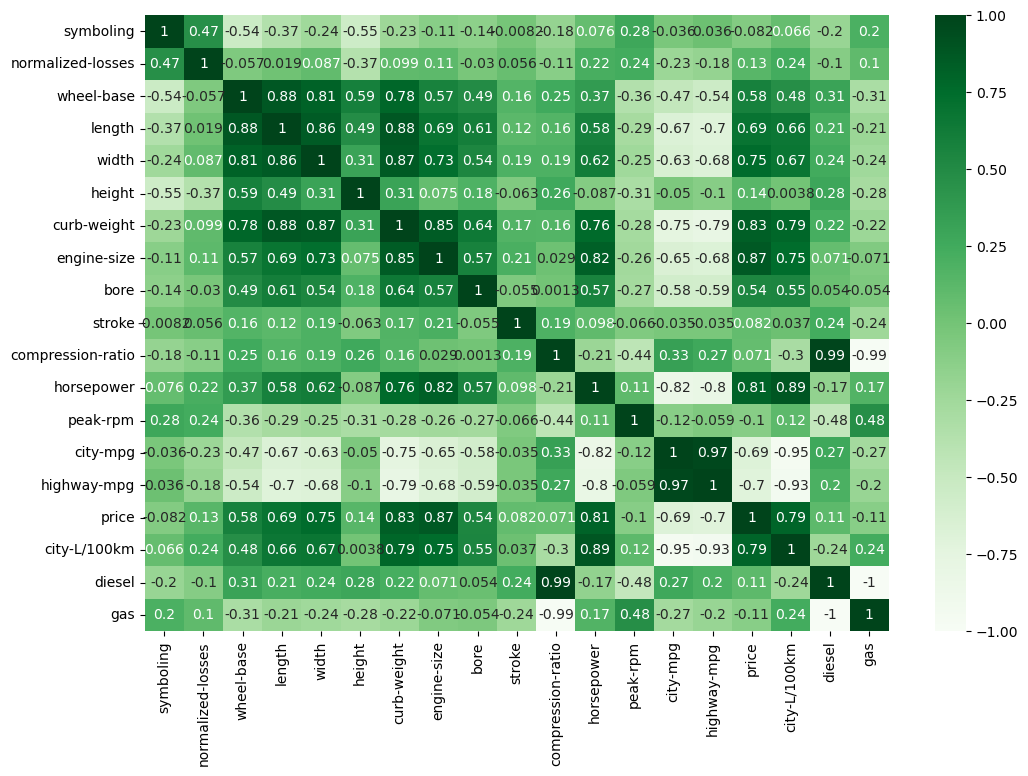

In [32]:
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Generate the heatmap with increased size
sns.heatmap(df.corr(), annot=True, cmap='Greens')

# Show the plot
plt.show()

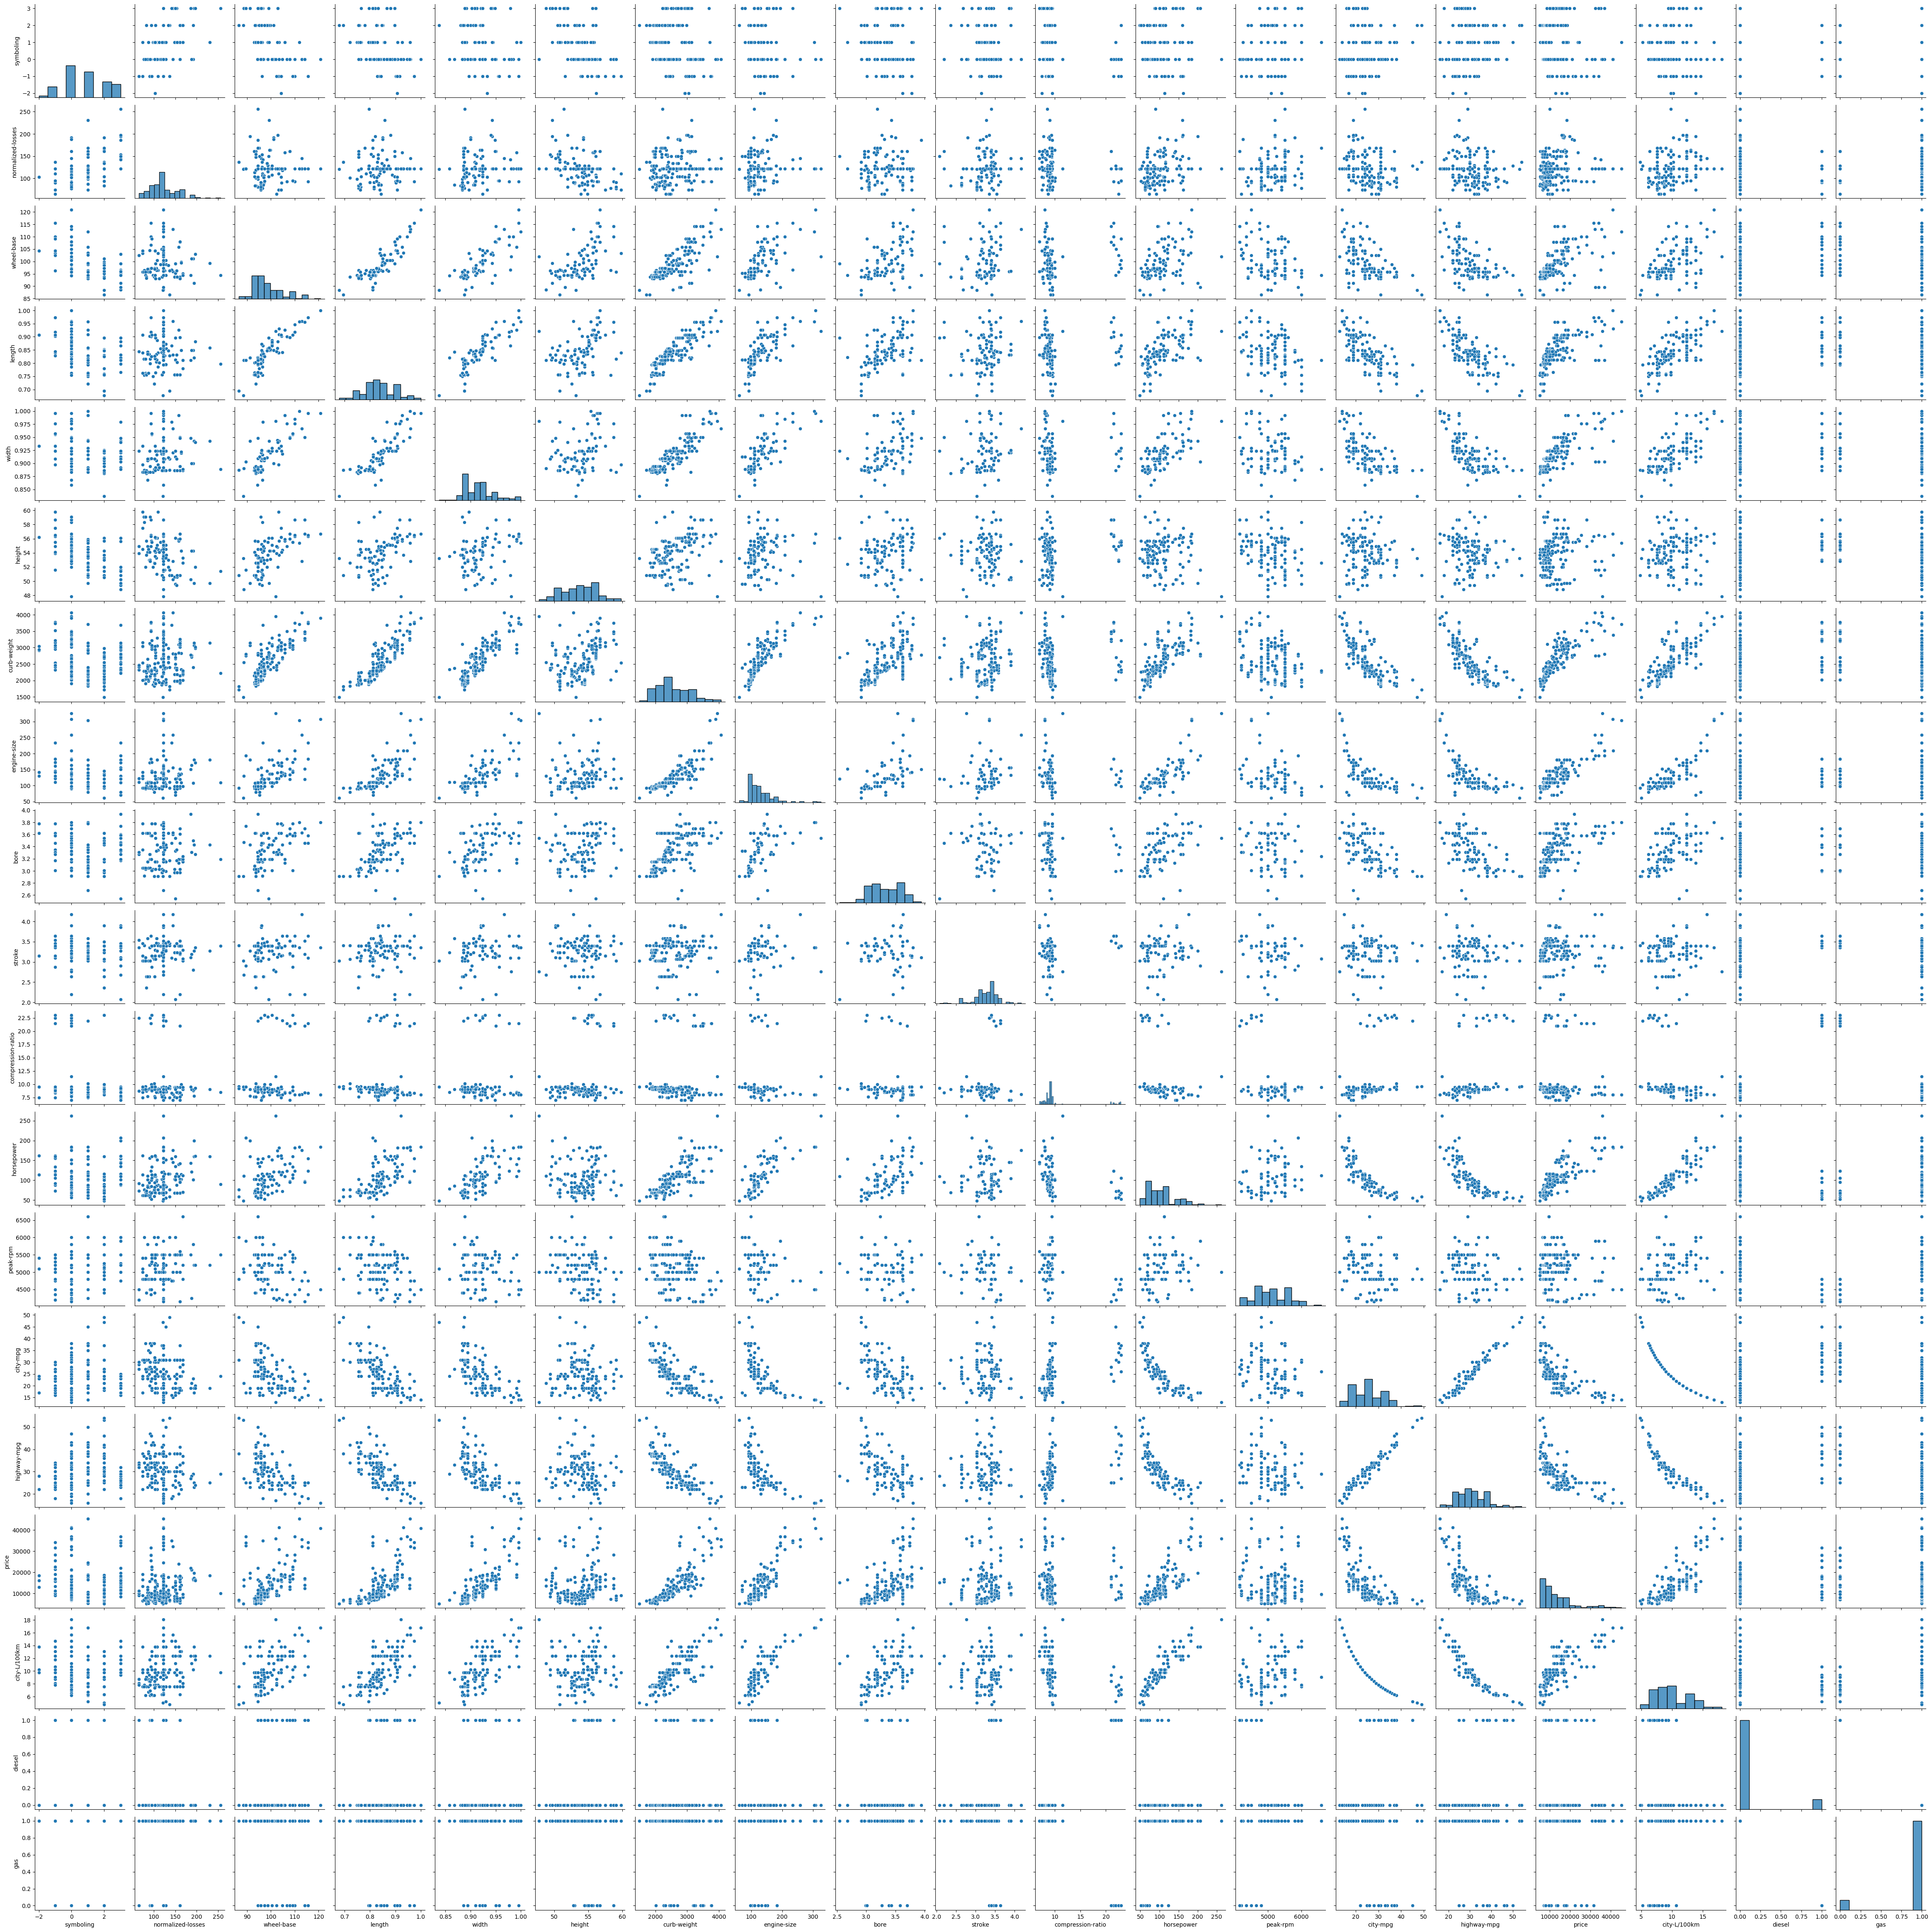

In [33]:
sns.pairplot(df)

<Axes: >

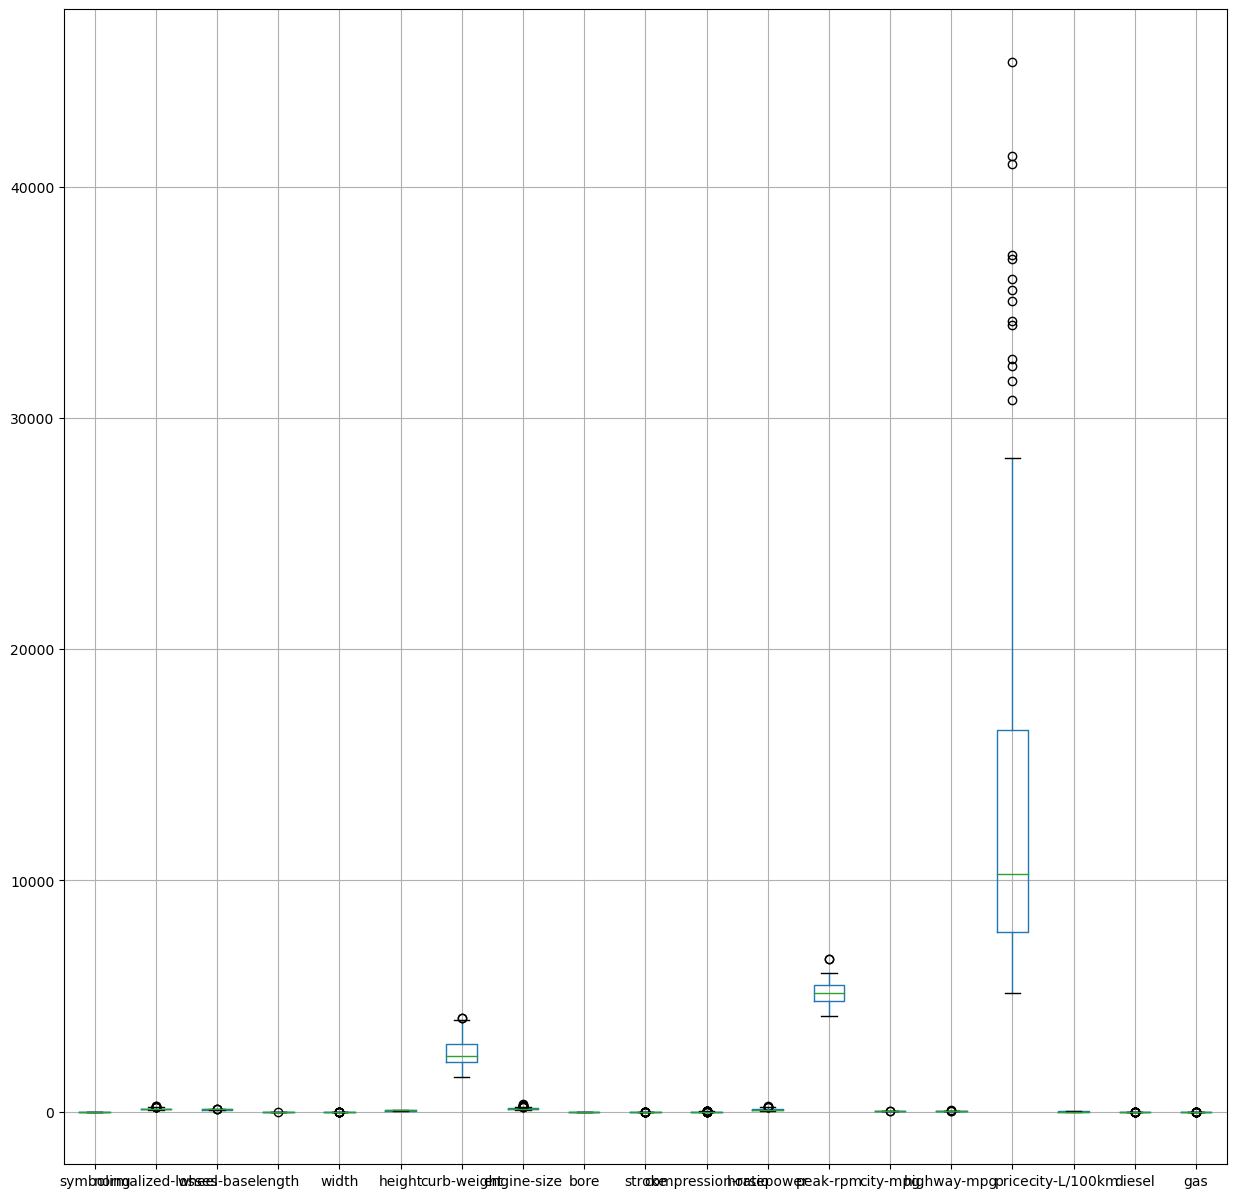

In [38]:
plt.figure(figsize=(15,15))
df.boxplot()

In [39]:
# Define features and target variable
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']


In [40]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Train the model
regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [42]:
# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 6387667.981707317
R-squared: 0.9477904662234927
